In [1]:
import tstrippy
import h5py
import astropy.units as u
import astropy.coordinates as coord
import numpy as np

In [2]:
GCname              =   "Pal5"
path_to_init_conds  =   "/scratch2/sferrone/simulations/MonteCarloObservables/"+GCname+"-observables.hdf5"
myinit_conds        =   h5py.File(path_to_init_conds, 'r')

In [3]:
myinit_conds['monte-carlo-000'].keys()

<KeysViewHDF5 ['DEC', 'Mass', 'RA', 'RV', 'Rsun', 'mu_delta', 'mualpha', 'rh_m']>

In [4]:
RA          =   myinit_conds['monte-carlo-000']['RA'][0]*u.Unit(myinit_conds.attrs['RA'])
DEC         =   myinit_conds['monte-carlo-000']['DEC'][0]*u.Unit(myinit_conds.attrs['DEC'])
rh_m        =   myinit_conds['monte-carlo-000']['rh_m'][0]*u.Unit(myinit_conds.attrs['rh_m'])
Rsun        =   myinit_conds['monte-carlo-000']['Rsun'][0]*u.Unit(myinit_conds.attrs['Rsun'])
RV          =   myinit_conds['monte-carlo-000']['RV'][0]*u.Unit(myinit_conds.attrs['RV'])
mualpha     =   myinit_conds['monte-carlo-000']['mualpha'][0]*u.Unit(myinit_conds.attrs['mualpha'])
mu_delta    =   myinit_conds['monte-carlo-000']['mu_delta'][0]*u.Unit(myinit_conds.attrs['mu_delta'])

In [5]:
refframe=tstrippy.Parsers.potential_parameters.MWreferenceframe()
MWparams=tstrippy.Parsers.potential_parameters.pouliasis2017pii()

In [6]:
sky     = coord.SkyCoord(ra=RA, dec=DEC,distance=Rsun, radial_velocity=RV, pm_ra_cosdec=mualpha, pm_dec=mu_delta, )
galcen  = sky.transform_to(refframe)

In [7]:
dt = 1e4*u.yr
timestep=dt.to(tstrippy.Parsers.potential_parameters.unitbasis['time'])
NSTEP=int((5e9*u.yr/dt).value)

In [8]:
r = np.sqrt(galcen.x**2 + galcen.y**2+galcen.z**2)
v = np.sqrt(galcen.v_x**2 + galcen.v_y**2+galcen.v_z**2)
tdyn=r/v
print("frac {:0.0f}".format(tdyn/timestep))

frac 11021


In [9]:
tstrippy.lib.integrator.setstaticgalaxy("pouliasis2017pii",MWparams)

In [102]:
tstrippy.lib.integrator.setintegrationparameters(0,timestep.value,NSTEP)

In [103]:
tstrippy.lib.integrator.setinitialkinematics(
    galcen.x.to(u.kpc).value,
    galcen.y.to(u.kpc).value,
    galcen.z.to(u.kpc).value,
    galcen.v_x.to(u.km/u.s).value,
    galcen.v_y.to(u.km/u.s).value,
    galcen.v_z.to(u.km/u.s).value)

In [104]:
xt,yt,zt,vxt,vyt,vzt=tstrippy.lib.integrator.leapfrogintime(NSTEP,1)

In [105]:
tstrippy.lib.integrator.deallocate()

In [106]:
import matplotlib.pyplot as plt

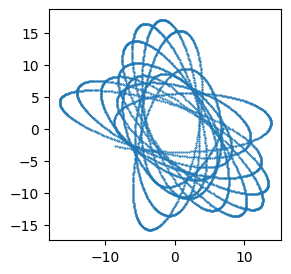

In [108]:
fig,axis=plt.subplots(1,1,figsize=(3,3))
nskip=100
axis.plot(xt[0,::nskip],yt[0,::nskip],'.',markersize=1)